In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
lin_mod = linear_model.LinearRegression()

Importing Galton height dataset from randomservices.com. 

In [2]:
data = pd.read_csv("http://www.randomservices.org/random/data/Galton.txt", sep="\t")
print data.head(5)

  Family  Father  Mother Gender  Height  Kids
0      1    78.5    67.0      M    73.2     4
1      1    78.5    67.0      F    69.2     4
2      1    78.5    67.0      F    69.0     4
3      1    78.5    67.0      F    69.0     4
4      2    75.5    66.5      M    73.5     4


Since some families did not have all their children measured, I will be disregarding the family and the amount of kids in the family column so each child will be counted as a discrete data point.

In [3]:
data = data[["Father","Mother","Gender","Height"]]
print data.head(5)
print "Rows: %i, Columns: %i"% (data.shape)

   Father  Mother Gender  Height
0    78.5    67.0      M    73.2
1    78.5    67.0      F    69.2
2    78.5    67.0      F    69.0
3    78.5    67.0      F    69.0
4    75.5    66.5      M    73.5
Rows: 898, Columns: 4


Try to correlate the height of the child with the father, and then the mother.

R^2:  0.0758202803404


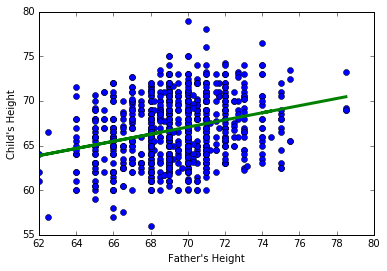

In [5]:
#First plot the the child's height vs father's height 
plt.plot(data["Father"],data["Height"], 'o')
plt.xlabel("Father's Height")
plt.ylabel("Child's Height")
#Reshape data to perform linear regression
x = np.asarray(data["Father"]).reshape((data["Father"].shape[0],1))
y = np.asarray(data["Height"]).reshape((data["Height"].shape[0],1))
lin_mod.fit(x,y)
print "R^2: ",lin_mod.score(x,y)
#Plot line
y_pred = (lin_mod.coef_[0] * x) + lin_mod.intercept_[0]
plt.plot(x,y_pred,'-',linewidth=3)

R^2:  0.0406646962358


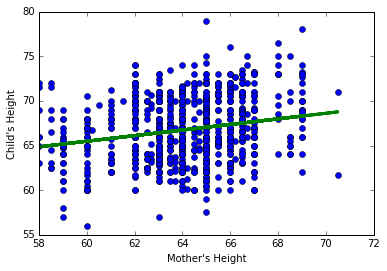

In [6]:
#Then plot the child's height vs mother's height 
plt.plot(data["Mother"],data["Height"], 'o')
plt.xlabel("Mother's Height")
plt.ylabel("Child's Height")
#Reshape data to perform linear regression
x = np.asarray(data["Mother"]).reshape((data["Mother"].shape[0],1))
y = np.asarray(data["Height"]).reshape((data["Height"].shape[0],1))
lin_mod.fit(x,y)
print "R^2: ",lin_mod.score(x,y)
#Plot line
y_pred = (lin_mod.coef_[0] * x) + lin_mod.intercept_[0]
plt.plot(x,y_pred,'-',linewidth=3)

It's easy to eye the data plots and see that the heights are not very well correlated. The data is all over the place and looks like a blocky square instead of a any form of linear shape. The regression line seems to cut the data in half. The Rsquared scores of both plots indicate that the father's height is more closely tied to the child's height, but with the whopping 0.035 difference between 0.075 and 0.040, even drawing this conclusion is pretty questionable.

Therefore, I will now attempt to run through this dataset again, but this time factoring in both the father's and the mother's heights-by averaging them to achieve a single value-to reach a conclusion for the child's height. 

R^2:  0.106977368685
Standard Deviation:  2.62876308845


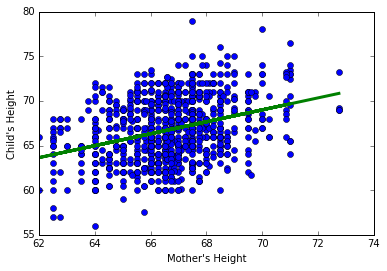

In [22]:
#Average parent's heights
x = np.asarray(data[["Father", "Mother"]])
x = np.mean(x, axis=1).reshape(x.shape[0],1)
y = np.asarray(data["Height"]).reshape((data["Height"].shape[0],1))
lin_mod.fit(x,y)
plt.plot(x,y, 'o')
plt.xlabel("Mother's Height")
plt.ylabel("Child's Height")
print "R^2: ",lin_mod.score(x,y)
#Plot line
y_pred = (lin_mod.coef_[0] * x) + lin_mod.intercept_[0]
plt.plot(x,y_pred,'-',linewidth=3)

While the Rsquared value seems a bit higher and the points closers to the regression line, it's still pretty evident that there's very little relation between the individual parents' heights and the height of their child. Another distinction that can be used to separate the data some more is by dividing the the children into male and female.

In [33]:
#Divide data by getting both height and gender, dividing it by gender
male = data[["Father","Mother", "Height", "Gender"]][data["Gender"] == "M"]
xm = np.asarray(male[["Father", "Mother"]])
xm = np.mean(xm, axis=1).reshape(xm.shape[0],1)
ym = male[["Height"]]
ymstd = np.std(ym)[0]
female = data[["Father","Mother", "Height", "Gender"]][data["Gender"] == "F"]
xf = np.asarray(female[["Father", "Mother"]])
xf = np.mean(xf, axis=1).reshape(xf.shape[0],1)
yf = female[["Height"]]
yfstd = np.std(yf)[0]

Mean:  69.2288172043
Standard Deviation:  2.62876308845
R^2:  0.237557898164


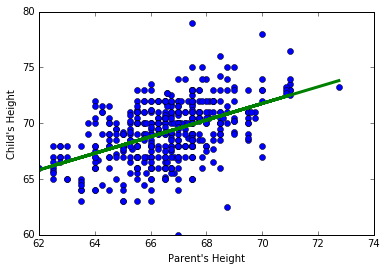

In [34]:
#Perform multi linear regression again on the males first
ymm  = np.mean(ym)[0]
x = np.asarray(xm).reshape((xm.shape[0],1))
y = np.asarray(ym).reshape((ym.shape[0],1))
lin_mod.fit(x,y)
plt.plot(x,y, 'o')
plt.xlabel("Parent's Height")
plt.ylabel("Child's Height")
print "Mean: ",ymm
print "Standard Deviation: ",ymstd
print "R^2: ",lin_mod.score(x,y)
#Plot line
y_pred = (lin_mod.coef_[0] * x) + lin_mod.intercept_[0]
plt.plot(x,y_pred,'-',linewidth=3)

Mean:  64.1101616628
Standard Deviation:  2.3675809312
R^2:  0.29312974825


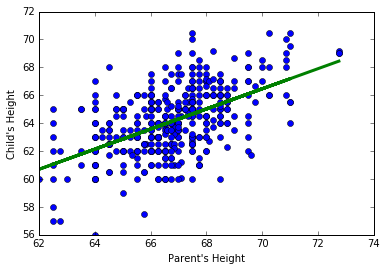

In [35]:
#Perform multi linear regression again on the males first
yfm = np.mean(yf)[0]
x = np.asarray(xf).reshape((xf.shape[0],1))
y = np.asarray(yf).reshape((yf.shape[0],1))
lin_mod.fit(x,y)
plt.plot(x,y, 'o')
plt.xlabel("Parent's Height")
plt.ylabel("Child's Height")
print "Mean: ",yfm
print "Standard Deviation: ",yfstd
print "R^2: ",lin_mod.score(x,y)
#Plot line
y_pred = (lin_mod.coef_[0] * x) + lin_mod.intercept_[0]
plt.plot(x,y_pred,'-',linewidth=3)

The conclusion that we can draw from this is that for the parent's height contribution for females is greater than for males. The Rsquared value of the parent's height to the child's is almost 0.3, while the one for males is closer to 0.24. 

A larger data is needed to draw a more refined result. However for this Galton data set, my conclusion final conclusion is that a father's height is marginally more impactful on the height of the child, and the overall height of both parents affect females more than males.

In [50]:
#Predcitor
gender = "female"
father = 67
mother = 64
avg = np.mean([father,mother])
gender_mean = 0
gender_std = 0
if gender == "male":
    lin_mod.fit(xm,ym)
    gender_mean = ymm
    gender_std = ymstd
if gender == "female":
    lin_mod.fit(xf,yf)
    gender_mean = yfm
    gender_std = yfstd
ypred = lin_mod.predict(avg)[0][0]
print "Galton predicted height for child: %0.2f"%(ypred)
print "Galton average for your gender was %0.2f, with a standard deviation of %0.2f, meaning you are %0.2f standard deviations from the Galton mean."\
        %(gender_mean,gender_std,((ypred-gender_mean)/gender_std))

Galton predicted height for child: 63.22
Galton average for your gender was 64.11, with a standard deviation of 2.37, meaning you are -0.38 standard deviations from the Galton mean.
